### No 2 - Feature Engineering

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [15]:
#Baca dataset
data = pd.read_csv(r'D:\FILE_IRFAN_KARIM\Rakamin DS MSIB\Tugas\Homework Week 11\Homework/Churn_Fix.csv')
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.505353,0.0,0.0,42.0,2.0,0.000000,1.0,1.0,1.0,0.506735,True
1,0.481799,2.0,0.0,41.0,1.0,0.334031,1.0,0.0,1.0,0.562709,False
2,0.254818,0.0,0.0,42.0,8.0,0.636357,3.0,1.0,0.0,0.569654,True
3,0.676660,0.0,0.0,39.0,1.0,0.000000,2.0,0.0,0.0,0.469120,False
4,1.000000,2.0,0.0,43.0,2.0,0.500246,1.0,1.0,1.0,0.395400,False


Pada data diatas, sebelumnya saya sudah membuang beberapa kolom yang tidak terlalu dibutuhkan sehingga total kolom nya sekarang hanya ada 11.

**Karena kolom Exited masih berupa nilai categorik kita ubah menjadi numerik terlebih dahulu**

In [5]:
## Menggunakan Label Encoder
from sklearn.preprocessing import LabelEncoder
# Buat objek LabelEncoder
label_encoder = LabelEncoder()
data['Exited'] = label_encoder.fit_transform(data['Exited'])

In [21]:
data['Exited'].value_counts()

0    7677
1    3838
Name: Exited, dtype: int64

# Feature Selection
**Sebelum kita memasuki seleksi fitur ada baiknya kita melihat korelasi antar fitur terlebih dahulu dengan menggunakan heatmap agar lebih jelas**

In [8]:
data.corr(method='pearson')

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,0.012353,-0.005306,-0.012533,0.009215,0.003400,0.009192,-0.003050,0.021936,-0.001035,-0.019650
Geography,0.012353,1.000000,0.001084,0.024695,-0.005093,0.072175,0.011300,-0.016869,0.008270,-0.002130,0.042196
Gender,-0.005306,0.001084,1.000000,-0.048071,0.014371,0.001275,-0.006972,-0.002672,0.030476,-0.016295,-0.137040
Age,-0.012533,0.024695,-0.048071,1.000000,-0.017528,0.053041,-0.083918,-0.018345,-0.016647,-0.006944,0.407782
Tenure,0.009215,-0.005093,0.014371,-0.017528,1.000000,-0.001079,0.015119,0.016470,-0.030413,0.018541,-0.020152
Balance,0.003400,0.072175,0.001275,0.053041,-0.001079,1.000000,-0.287414,-0.013042,-0.017222,0.012575,0.156342
NumOfProducts,0.009192,0.011300,-0.006972,-0.083918,0.015119,-0.287414,1.000000,0.007594,0.032541,0.016591,-0.143714
HasCrCard,-0.003050,-0.016869,-0.002672,-0.018345,0.016470,-0.013042,0.007594,1.000000,-0.028228,-0.001916,-0.004171
IsActiveMember,0.021936,0.008270,0.030476,-0.016647,-0.030413,-0.017222,0.032541,-0.028228,1.000000,-0.012946,-0.182962
EstimatedSalary,-0.001035,-0.002130,-0.016295,-0.006944,0.018541,0.012575,0.016591,-0.001916,-0.012946,1.000000,0.011736


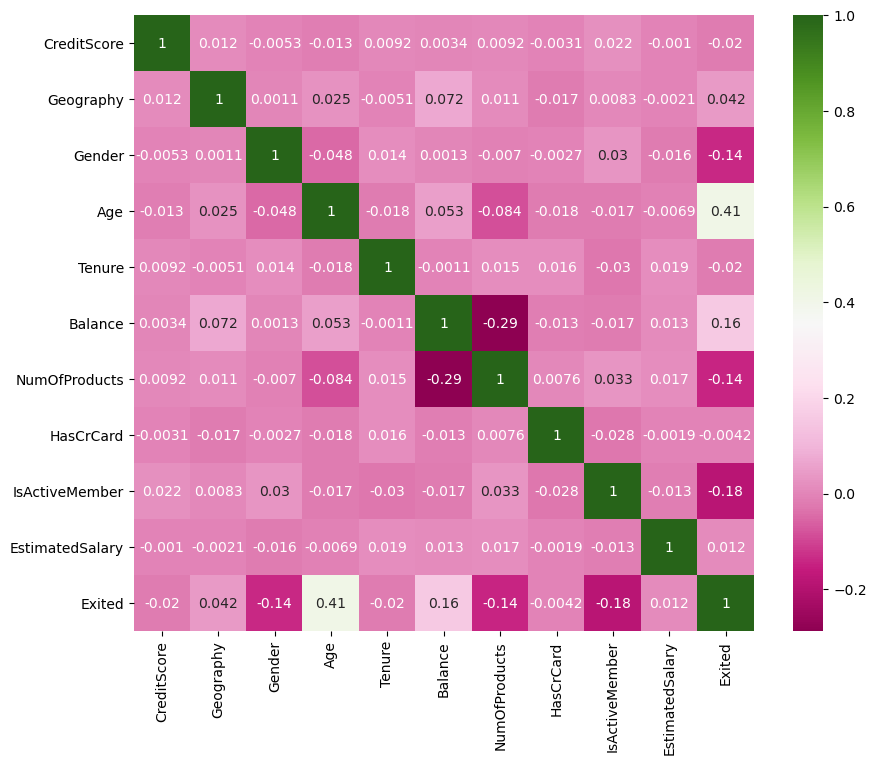

In [10]:
cek_corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(cek_corr, cmap='PiYG', annot=True)
#plt.savefig(r'D:\FILE_IRFAN_KARIM\Rakamin DS MSIB\Tugas\Homework Week 11\Homework\PLOT/Heatmap.png')
plt.show()

#### Insight Feature Selection
Dapat dilihat pada visualisasi disamping, tidak ditemukannya fitur yang redundan. Artinya kita tidak perlu membuang suatu fitur, fitur-fitur di dalam dataset ini bisa dipakai dan tinggal menambahkan feature baru agar bisa mengambil insight lebih banyak serta membantu meningkatkan performa model.

# Feature Engineering

In [6]:
data['Balance_to_EstimatedSalary'] = data['Balance'] / data['EstimatedSalary']
data['Age_to_Tenure'] = data['Age'] / data['Tenure']
data['CreditScore_to_Age'] = data['CreditScore'] / data['Age']
data['CreditScore_to_Balance'] = data['CreditScore'] / (data['Balance'] + 1)
data['NumOfProducts_to_Age'] = data['NumOfProducts'] / data['Age']

1. **Balance_to_EstimatedSalary**: Fitur ini menghitung rasio antara saldo rekening pelanggan dan gaji estimasi pelanggan. Ini dapat memberikan indikasi seberapa besar persentase dari gaji pelanggan yang disimpan di rekening bank. Fitur ini mungkin berguna untuk mengidentifikasi pola-pola yang berkaitan dengan besarnya saldo rekening relatif terhadap gaji.

2. **Age_to_Tenure**: Fitur ini menghitung rasio antara usia pelanggan dan lamanya pelanggan menjadi nasabah bank. Ini mencoba mengukur seberapa lama pelanggan telah menjadi nasabah dalam konteks usianya. Hal ini bisa membantu dalam memahami apakah pelanggan yang lebih muda atau lebih tua cenderung menjadi pelanggan baru atau setia.

3. **CreditScore_to_Age**: Fitur ini menghitung rasio antara skor kredit pelanggan dan usia pelanggan. Ini mencoba melihat hubungan antara skor kredit dan usia, apakah skor kredit cenderung berbeda antara kelompok usia yang berbeda.

4. **CreditScore_to_Balance**: Fitur ini menghitung rasio antara skor kredit pelanggan dan saldo rekening pelanggan. Ini dapat memberikan gambaran tentang apakah ada korelasi antara skor kredit dan seberapa banyak uang yang disimpan di rekening.

5. **NumOfProducts_to_Age**: Fitur ini menghitung rasio antara jumlah produk yang dimiliki pelanggan dan usia pelanggan. Ini bisa membantu dalam memahami sejauh mana pelanggan yang lebih muda atau lebih tua cenderung memiliki lebih banyak produk perbankan.

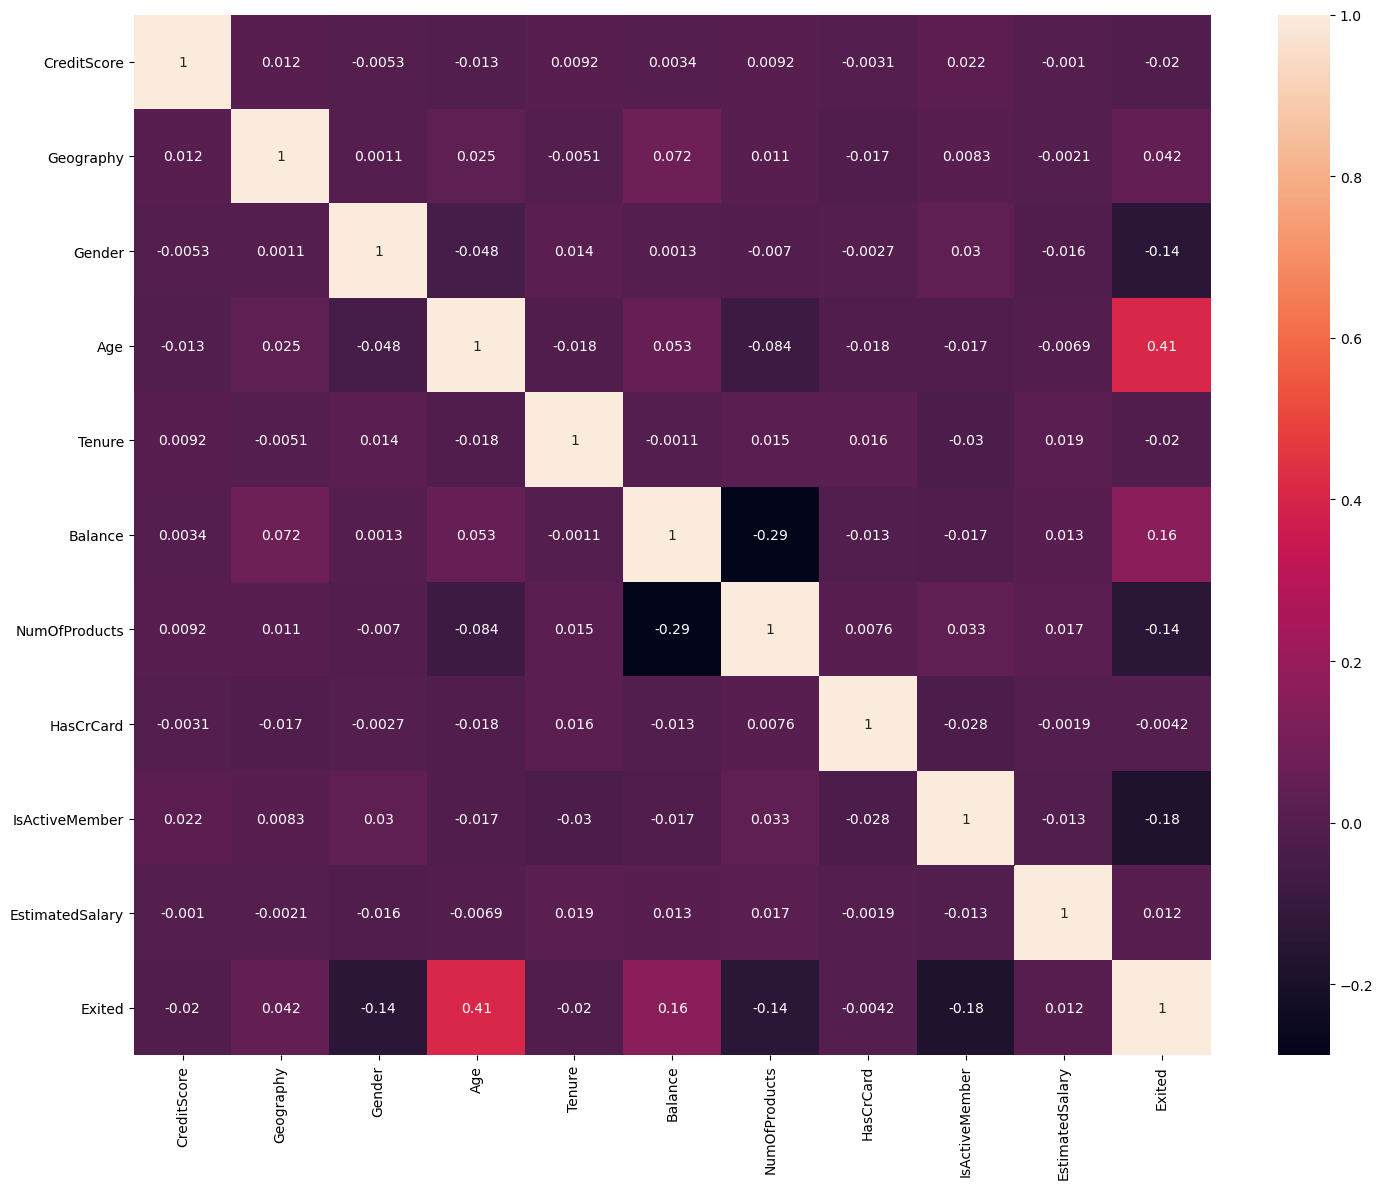

In [16]:
cek_after_engineering = data.corr()
plt.figure(figsize=(15,12))
sns.heatmap(cek_after_engineering, annot=True)
#plt.savefig(r'D:\FILE_IRFAN_KARIM\Rakamin DS MSIB\Tugas\Homework Week 11\Homework\PLOT/Heatmap2.png')
plt.tight_layout()
plt.show()

**Dapat dilihat pada visualisasi diatas, tidak ditemukannya fitur yang redundan. Artinya kita tidak perlu membuang suatu fitur, fitur-fitur di dalam dataset ini bisa dipakai dan tinggal menambahkan feature baru agar bisa mengambil insight lebih banyak serta membantu meningkatkan performa model.**

In [31]:
#Cek informasi kolom setelah ditambahkan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15354 entries, 0 to 15353
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CreditScore                 15354 non-null  float64
 1   Geography                   15354 non-null  float64
 2   Gender                      15354 non-null  float64
 3   Age                         15354 non-null  float64
 4   Tenure                      15354 non-null  float64
 5   Balance                     15354 non-null  float64
 6   NumOfProducts               15354 non-null  float64
 7   HasCrCard                   15354 non-null  float64
 8   IsActiveMember              15354 non-null  float64
 9   EstimatedSalary             15354 non-null  float64
 10  Exited                      15354 non-null  bool   
 11  Balance_to_EstimatedSalary  15354 non-null  float64
 12  Age_to_Tenure               15354 non-null  float64
 13  CreditScore_to_Age          153

# Lampiran Feature Engineering

In [ ]:
# 1. Age Groups
df['Age_Group'] = pd.cut(df['Age'], bins=[0,30,40,50,100], labels=['Young','Middle-Aged','Senior','Elderly'])

# 2. Balance Categories
df['Balance_Category'] = pd.cut(df['Balance'], bins=[0,50000,100000,150000,250000], labels=['Low','Medium','High','Very High'])

# 3. Credit Score Ranges
df['CreditScore_Range'] = pd.cut(df['CreditScore'], bins=[350,500,650,750,850], labels=['Poor', 'Fair', 'Good', 'Excellent'])

# 4. Tenure Categories
df['Tenure_Category'] = pd.cut(df['Tenure'], bins=[0,2,5,10], labels=['Short Term','Medium Term', 'Long Term'])

# 5. NumOfProducts Range
df['NumOfProducts_category'] = pd.cut(df['NumOfProducts'], bins=[0,1,3,4], labels=['Low','Medium','High'])

# 6. Salary Range
df['Salary_Range'] = pd.cut(df['EstimatedSalary'], bins=[0,50000,100000, 150000, 200000], labels=['Low','Medium','High','Very High'])

# 7. Customer Relationship (combining IsActiveMember and HasCrCard)
df['Customer_Relationship'] = df['IsActiveMember'].astype(str) + df['HasCrCard'].astype(str)

# 8. Combine NumProduct to Age Group
df['NumProduct_AgeGroup'] = df['NumOfProducts_category'].astype(str) + '_' + df['Age_Group'].astype(str)

# 9. Salary to Balance Ratio
df['Salary_to_Balance_Ratio'] = df['EstimatedSalary'] / (df['Balance'] +  1) #Adding 1 to avoid division by zero(0)

# 10. Interaction between Age and Balance
df['Balance_AgeGroup'] = df['Balance_Category'].astype(str) + '_' + df['Age_Group'].astype(str)

In [ ]:
# 11. Interaction between CreditScore and NumOfProducts
df['CreditScore_NumProducts'] = df['CreditScore_Range'].astype(str) + '_' + df['NumOfProducts_category'].astype(str)

# 12. Interaction between Age and CreditScore
df['CreditScore_AgeGroup'] = df['CreditScore_Range'].astype(str) + '_' + df['Age_Group'].astype(str)

# 13. Interaction between Geography and Gender
df['Geography_Gender_Interact'] = df['Geography'] + '_' + df['Gender']

# 14. Tenure and Number of Products Interaction
df['Tenure_NumProducts'] = df['Tenure_Category'].astype(str) + '_' + df['NumOfProducts_category'].astype(str)

# 15. Interaction Balance & Product 
df['Balance_NumProducts'] = df['Balance_Category'].astype(str) + '_' + df['NumOfProducts_category'].astype(str)

# 16. Salary to Credit Score Ratio
df['Salary_NumProducts'] = df['Salary_Range'].astype(str) + '_' + df['CreditScore_Range'].astype(str)

# 17. Age and Balance Interaction
df['Balance_AgeGroup'] = df['Balance_Category'].astype(str) + '_' + df['Age_Group'].astype(str)

# 18. Percentage of Products Used
df['Product_Usage_Percentage'] = (df['NumOfProducts'] / 4) * 100 # Assuming 4 is the maximum number of products

# 19. Customer Lifetime
df['Customer_Lifetime'] = df['Age'] * (1 / (1 - df['Exited']))

# 20. Balance to Age Ratio
df['Balance_to_Age_Ratio'] = df['Balance'] / df['Age']

In [ ]:
# 21. Average Credit Score in Age Group
age_group_avg_credit = df.groupby('Age_Group')['CreditScore'].mean().reset_index()
age_group_avg_credit.rename(columns={'CreditScore':'Avg_CreditScore_in_Age_Group'}, inplace=True)
df = df.merge(age_group_avg_credit, on='Age_Group', how='left')

# 22. Tenure to Age Ratio
df['Tenure_to_Age_Ratio'] = df['Tenure'] / df['Age']

# 23. Salary Rank
df['Salary_Rank'] = df['EstimatedSalary'].rank(pct=True)

# 24. Credit Score to Age Ratio
df['CreditScore_to_Age_Ratio'] = df['CreditScore'] / df['Age']

# Transform category into object
# List of column names with category data type
category_columns = ['Age_Group', 'Balance_Category', 'CreditScore_Range', 'Tenure_Category', 'NumOfProducts_category', 'Salary_Range']

# Convert the specified columns from category to object
df[category_columns] = df[category_columns].astype('object')